<a href="https://colab.research.google.com/github/BrianGithinji-BMG/First-Repo/blob/main/Pandas_ipynb_Data_Cleaning%26Groupby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Concepts

1. Data Cleaning with Pandas
2. Pandas Groupby
3. Combining Dataframes

The Pump it UP dataset is from Taarifa and the Tanzanian Ministry of water

Dataset link: https://drive.google.com/drive/folders/1N6aPcn3T7z6n0QaPrn5PDHhaYXy0_VNh

In [1]:
# Importing the necessary libararies.
import pandas  as pd
import numpy as np # for dealing with numbers
import seaborn as sns # for visualization
import matplotlib.pyplot as plt # plotting

#library for warning function
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Loading our datasets.
train = pd.read_csv('/content/Training set values.csv')
labels = pd.read_csv('/content/Training set labels.csv')


#Data Exploration

In [5]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [6]:
labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [7]:
df = pd.merge(train, labels, on='id')

In [8]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [9]:
df.shape

(6196, 41)

We have 6196 rows and 41 columns

In [10]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

Data Cleaning

<Axes: ylabel='amount_tsh'>

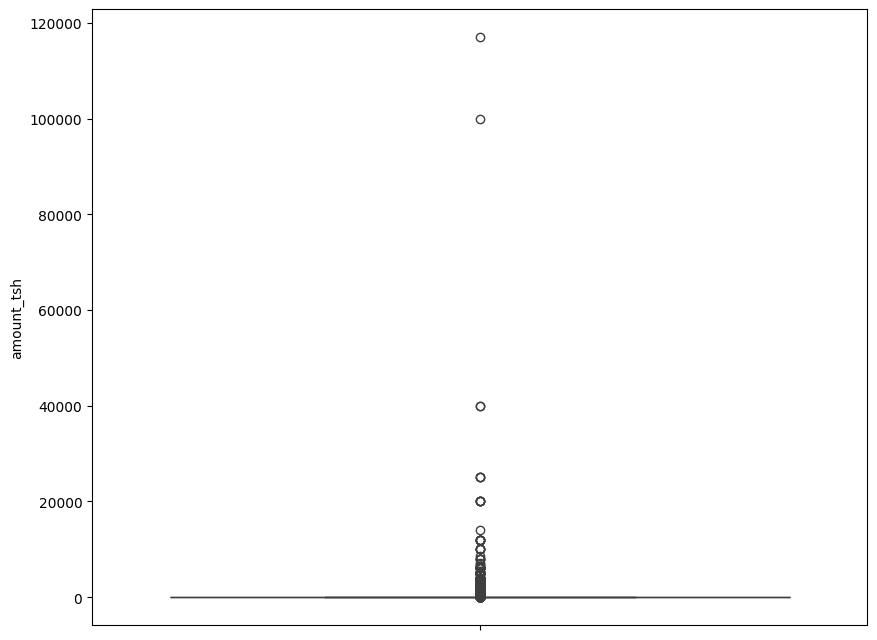

In [11]:
# Checking for outliers

plt.figure (figsize=(10,8))
sns.boxplot(df['amount_tsh'])

<Axes: ylabel='population'>

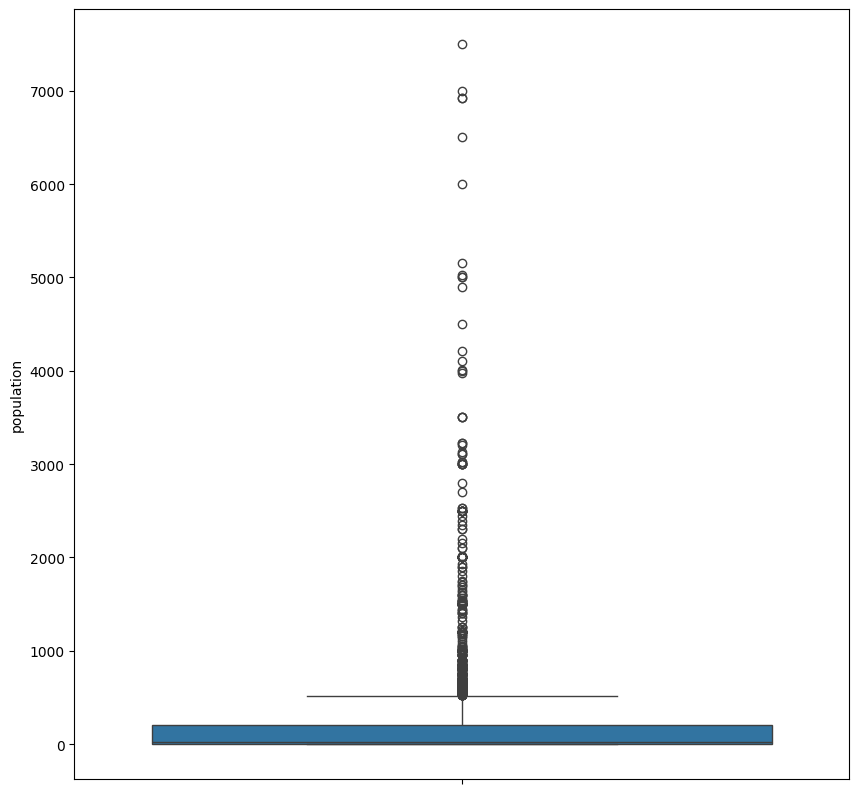

In [12]:
plt.figure(figsize=(10,10))
sns.boxplot(df['population'])

<Axes: ylabel='gps_height'>

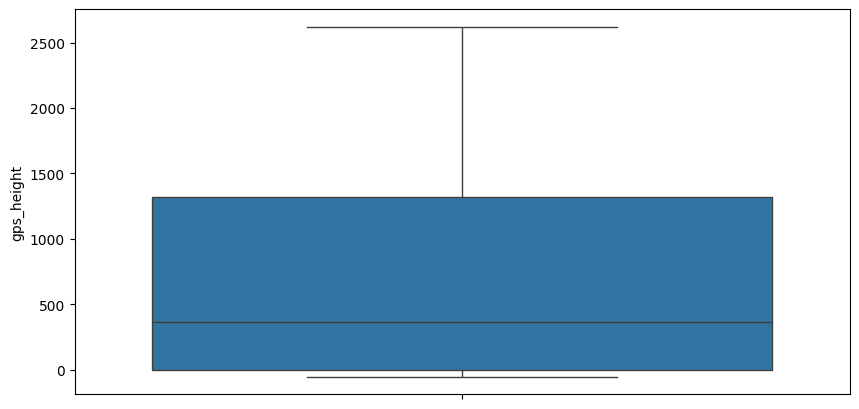

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(df['gps_height'])

Checking for duplicates

In [14]:
df.duplicated().sum()

0

Checking for null values

In [15]:
df.isnull().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    382
gps_height                  0
installer                 385
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 30
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            320
recorded_by                 0
scheme_management         413
scheme_name              3020
permit                    318
construction_year           1
extraction_type             1
extraction_type_group       1
extraction_type_class       1
management                  1
management_group            1
payment                     1
payment_type                1
water_quality               1
quality_group               1
quantity  

In [17]:
df['scheme_name'].value_counts()

scheme_name
K                          76
Borehole                   76
M                          44
Government                 42
Chalinze wate              37
                           ..
Lake Victoria basin         1
Nyamno                      1
Mtikanga gravity Scheme     1
Minaki Water Supply         1
Song                        1
Name: count, Length: 1197, dtype: int64

In [18]:
df['scheme_management'].value_counts()

scheme_management
VWC                 3807
WUG                  541
Water authority      318
WUA                  314
Water Board          301
Parastatal           172
Private operator     119
Company              117
Other                 80
Trust                 10
SWC                    4
Name: count, dtype: int64

In [19]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [20]:
# Imputing missing values for Scheme_Name col using "Missing"

df["scheme_name"] = df["scheme_name"].fillna("Missing")


In [21]:
df.isnull().sum()

id                         0
amount_tsh                 0
date_recorded              0
funder                   382
gps_height                 0
installer                385
longitude                  0
latitude                   0
wpt_name                   0
num_private                0
basin                      0
subvillage                30
region                     0
region_code                0
district_code              0
lga                        0
ward                       0
population                 0
public_meeting           320
recorded_by                0
scheme_management        413
scheme_name                0
permit                   318
construction_year          1
extraction_type            1
extraction_type_group      1
extraction_type_class      1
management                 1
management_group           1
payment                    1
payment_type               1
water_quality              1
quality_group              1
quantity                   1
quantity_group

In [22]:
df["public_meeting"].value_counts()

public_meeting
True     5344
False     532
Name: count, dtype: int64

In [23]:
df['recorded_by'].unique()

array(['GeoData Consultants Ltd', 'GeoData Consultant'], dtype=object)

# Drop any unnecessary columns

In [24]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [25]:
df.drop(["num_private", "region_code", "extraction_type_group", "management_group", "quality_group", "quantity_group", "source_class", "waterpoint_type_group" ], axis=1, inplace=True)

In [26]:
df.drop(['recorded_by'], axis=1, inplace=True)

In [27]:
df.shape

(6196, 32)

In [28]:
df['status_group'].value_counts()

status_group
functional                 3369
non functional             2366
functional needs repair     461
Name: count, dtype: int64

Pandas_Groupby

In [29]:
df.groupby(['payment', 'status_group']).size().groupby(level=1).max()

status_group
functional                 1215
functional needs repair     202
non functional             1221
dtype: int64

In [30]:
df.groupby(['payment', 'status_group']).count()

id  amount_tsh  \
payment               status_group                                
never pay             functional               1215        1215   
                      functional needs repair   202         202   
                      non functional           1221        1221   
other                 functional                 66          66   
                      functional needs repair    11          11   
                      non functional             30          30   
pay annually          functional                278         278   
                      functional needs repair    15          15   
                      non functional             67          67   
pay monthly           functional                610         610   
                      functional needs repair   104         104   
                      non functional            193         193   
pay per bucket        functional                612         612   
                      functional needs repair    42          42   
                      non functional            290         290   
pay when scheme fails functional                242         242   
                      functional needs repair    33          33   
                      non functional            129         129   
unknown               functional                345         345   
                      functional needs repair    54          54   
                      non functional            436         436   

                                               date_recorded  funder  \
payment               status_group                                     
never pay             functional                        1215    1100   
                      functional needs repair            202     162   
                      non functional                    1221    1179   
other                 functional                          66      66   
                      functional needs repair             11      11   
                      non functional                      30      29   
pay annually          functional                         278     264   
                      functional needs repair             15      15   
                      non functional                      67      66   
pay monthly           functional                         610     593   
                      functional needs repair            104      99   
                      non functional                     193     192   
pay per bucket        functional                         612     594   
                      functional needs repair             42      38   
                      non functional                     290     284   
pay when scheme fails functional                         242     240   
                      functional needs repair             33      33   
                      non functional                     129     125   
unknown               functional                         345     313   
                      functional needs repair             54      49   
                      non functional                     436     361   

                                               gps_height  installer  \
payment               status_group                                     
never pay             functional                     1215       1098   
                      functional needs repair         202        162   
                      non functional                 1221       1180   
other                 functional                       66         66   
                      functional needs repair          11         11   
                      non functional                   30         29   
pay annually          functional                      278        264   
                      functional needs repair          15         15   
                      non functional                   67         66   
pay monthly           functional                      610 

## Data Visualization

In [31]:
status = df['status_group'].value_counts()
status

status_group
functional                 3369
non functional             2366
functional needs repair     461
Name: count, dtype: int64

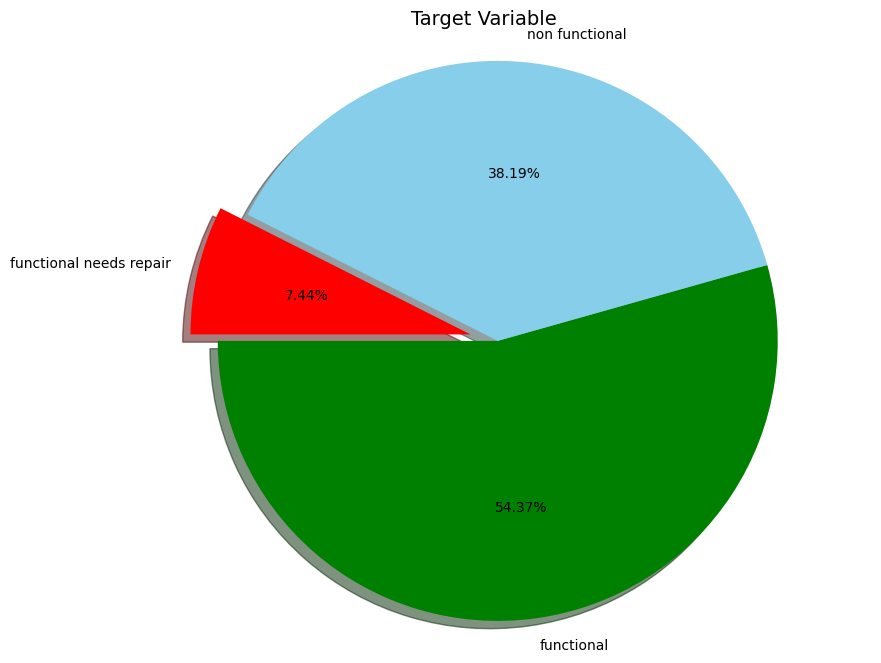

In [33]:
# 1. Visualizing the Distribution for our Target Variable

labels = ['functional', 'non functional', 'functional needs repair']
colors = ['green', 'skyblue', 'red']
fontsize = 14
plt.figure(figsize=(10, 8))
plt.title('Target Variable', fontsize=fontsize)
plt.pie(status, labels=labels, colors = colors, startangle = 180, shadow=True, explode=(0,0,0.1), autopct= '%1.2f%%')
plt.axis('equal')
plt.show;


Components of EDA

1. Univariate Analsis
2. Bivariate Analysis
3. Multivariate Analysis

In [34]:
#2. User-defined function for Univariate Analysis

def univariate(column, kind, title, xlabel, ylabel):
  sns.set(font_scale=1)
  if kind == 'pie':
    df[column].value_counts().plot(kind=kind, autopct= '%1.2f%%', figsize=(6,8), rot=90)
  elif kind == 'bar':
    df[column].value_counts().plot(kind=kind, figsize=(6,8), rot=90)
    plt.xlabel(xlabel=xlabel, labelpad=12)
    plt.ylabel(ylabel=ylabel, labelpad=12)
    plt.title(title, y=1)
    return plt.show

In [35]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage',
       'region', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_class',
       'management', 'payment', 'payment_type', 'water_quality', 'quantity',
       'source', 'source_type', 'waterpoint_type', 'status_group'],
      dtype='object')

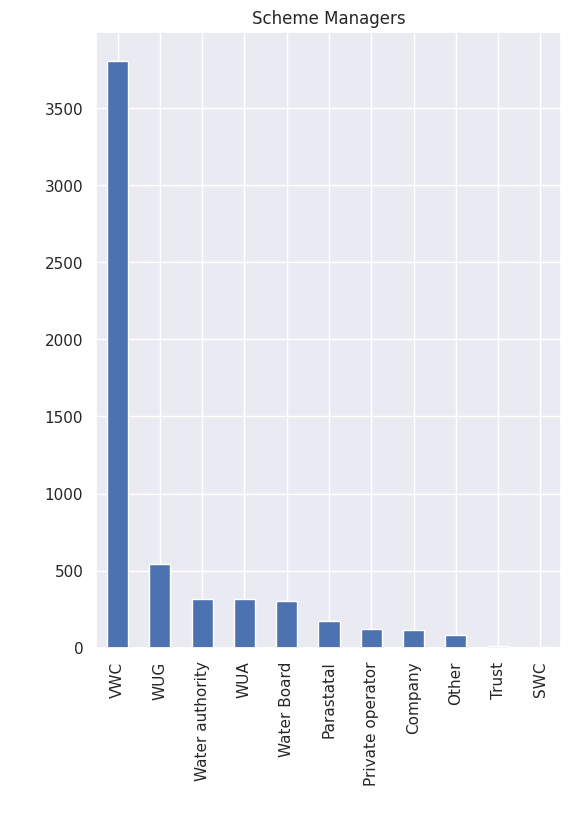

In [37]:
univariate('scheme_management', 'bar', 'Scheme Managers', ' ', ' ');

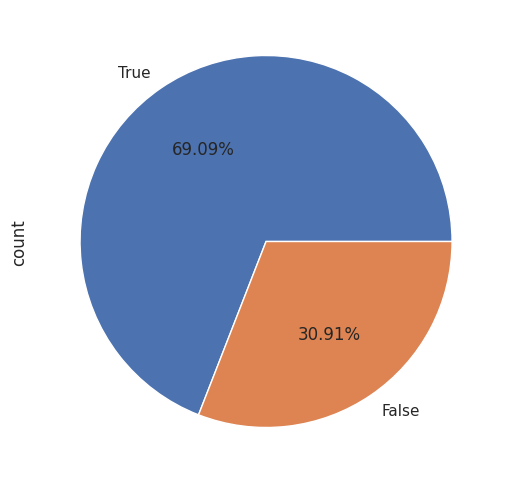

In [38]:
univariate('permit', 'pie', 'Waterpumps Permit Requirment', '', '')

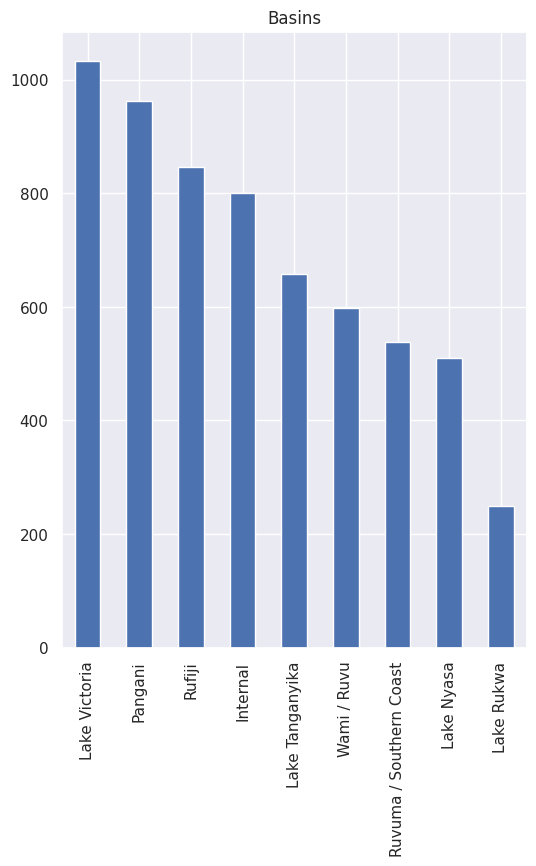

In [39]:
univariate('basin', 'bar', 'Basins', '', '');

**Challenge: Complete Data Cleaning and EDA using this Dataset**

#Titanic Dataset

In [40]:
# Importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [42]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S


from matplotlib import pyplot as plt
_df_0['PassengerId'].plot(kind='hist', bins=20, title='PassengerId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['SibSp'].plot(kind='hist', bins=20, title='SibSp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Pclass').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('Ticket').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='PassengerId', y='Survived', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Survived', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='Age', y='SibSp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='SibSp', y='Fare', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PassengerId']
  ys = series['Survived']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('PassengerId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Pclass')):
  _plot_series(series, series_name, i)
  fig.legend(title='Pclass', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PassengerId')
_ = plt.ylabel('Survived')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PassengerId']
  ys = series['Survived']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('PassengerId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PassengerId')
_ = plt.ylabel('Survived')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PassengerId']
  ys = series['Survived']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('PassengerId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PassengerId')
_ = plt.ylabel('Survived')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PassengerId']
  ys = series['Survived']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('PassengerId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Ticket')):
  _plot_series(series, series_name, i)
  fig.legend(title='Ticket', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PassengerId')
_ = plt.ylabel('Survived')

from matplotlib import pyplot as plt
_df_16['PassengerId'].plot(kind='line', figsize=(8, 4), title='PassengerId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Survived'].plot(kind='line', figsize=(8, 4), title='Survived')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['SibSp'].plot(kind='line', figsize=(8, 4), title='SibSp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Name'].value_counts()
    for x_label, grp in _df_20.groupby('Pclass')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Pclass')
_ = plt.ylabel('Name')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Sex'].value_counts()
    for x_label, grp in _df_21.groupby('Name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Name')
_ = plt.ylabel('Sex')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Ticket'].value_counts()
    for x_label, grp in _df_22.groupby('Sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Sex')
_ = plt.ylabel('Ticket')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Cabin'].value_counts()
    for x_label, grp in _df_23.groupby('Ticket')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Ticket')
_ = plt.ylabel('Cabin')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['Pclass'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='PassengerId', y='Pclass', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='PassengerId', y='Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='PassengerId', y='Sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['Ticket'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='PassengerId', y='Ticket', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [43]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S
5,6.0,0.0,3,"Moran, Mr. James",male,NaN,0.0,0.0,330877,8.4583,NaN,Q
6,7.0,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S
7,8.0,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3.0,1.0,349909,21.0750,NaN,S
8,9.0,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0.0,2.0,347742,11.1333,NaN,S
9,10.0,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1.0,0.0,237736,30.0708,NaN,C


In [44]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1386,839.0,0.0,?,"Rush, Mr. Alfred George John",male,47.0,0.0,4.0,113510,12.8750,B79,C
1387,839.0,1.0,2,"Skoog, Master. Harald",female,17.0,5.0,5.0,2671,17.4000,E49,NaN
1388,839.0,0.0,?,"Slocovski, Mr. Selman Francis",male,47.0,8.0,4.0,239854,7.0500,B49,NaN
1389,839.0,1.0,?,"Glynn, Miss. Mary Agatha",male,48.0,1.0,0.0,36866,8.6625,F G63,C
1390,839.0,0.0,?,"Sobey, Mr. Samuel James Hayden",male,14.5,3.0,4.0,2672,108.9000,C148,S


In [45]:
titanic_df.shape

(1391, 12)

This dataset has 891 rows and 12 columns

In [46]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1391 non-null   float64
 1   Survived     1391 non-null   float64
 2   Pclass       1391 non-null   object 
 3   Name         1391 non-null   object 
 4   Sex          1391 non-null   object 
 5   Age          1209 non-null   float64
 6   SibSp        1391 non-null   float64
 7   Parch        1391 non-null   float64
 8   Ticket       1391 non-null   object 
 9   Fare         1391 non-null   float64
 10  Cabin        602 non-null    object 
 11  Embarked     1289 non-null   object 
dtypes: float64(6), object(6)
memory usage: 130.5+ KB


In [47]:
# Summary Statistics
titanic_df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,1391.000000,1391.000000,1209.000000,1391.000000,1391.000000,1391.000000
mean,527.020848,0.381021,29.731894,1.399712,1.141625,32.145048
std,307.457244,0.485812,16.070125,2.097919,1.771294,48.662200
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,248.500000,0.000000,20.000000,0.000000,0.000000,7.895800
50%,596.000000,0.000000,27.000000,1.000000,0.000000,13.500000
75%,839.000000,1.000000,40.000000,2.000000,2.000000,33.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [48]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1391 non-null   float64
 1   Survived     1391 non-null   float64
 2   Pclass       1391 non-null   object 
 3   Name         1391 non-null   object 
 4   Sex          1391 non-null   object 
 5   Age          1209 non-null   float64
 6   SibSp        1391 non-null   float64
 7   Parch        1391 non-null   float64
 8   Ticket       1391 non-null   object 
 9   Fare         1391 non-null   float64
 10  Cabin        602 non-null    object 
 11  Embarked     1289 non-null   object 
dtypes: float64(6), object(6)
memory usage: 130.5+ KB


In [49]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [50]:
titanic_df['Pclass'].unique()

array(['3', '1', '2', '?'], dtype=object)

In [51]:
titanic_df['Pclass'].value_counts()

Pclass
3    661
1    305
2    277
?    148
Name: count, dtype: int64

## Data Cleaning


1. Check for Outliers
2. Check for Missing Values
3. Check for Duplicates
4. Drop Unnecessary columns


<Axes: ylabel='Age'>

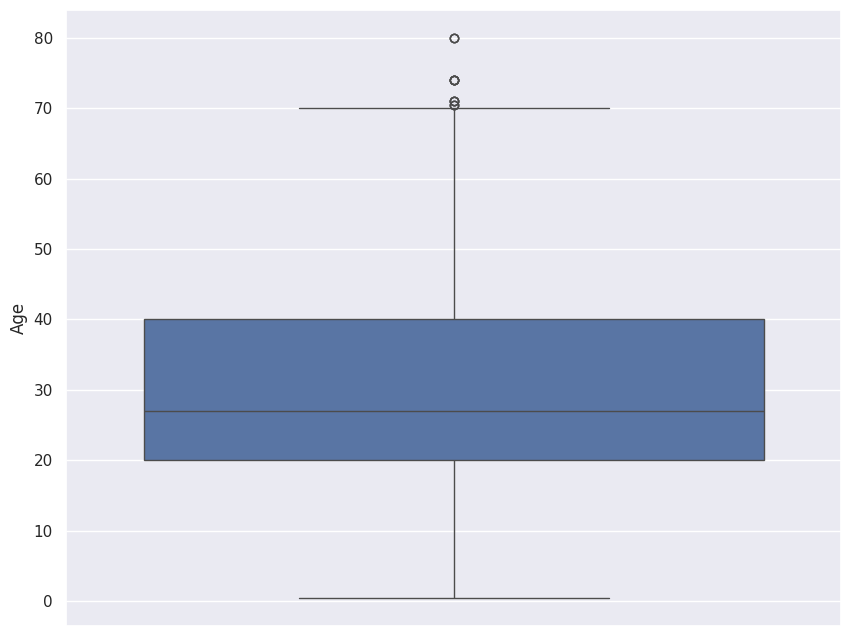

In [52]:
plt.figure(figsize= (10,8))
sns.boxplot(titanic_df['Age'])

<Axes: ylabel='Fare'>

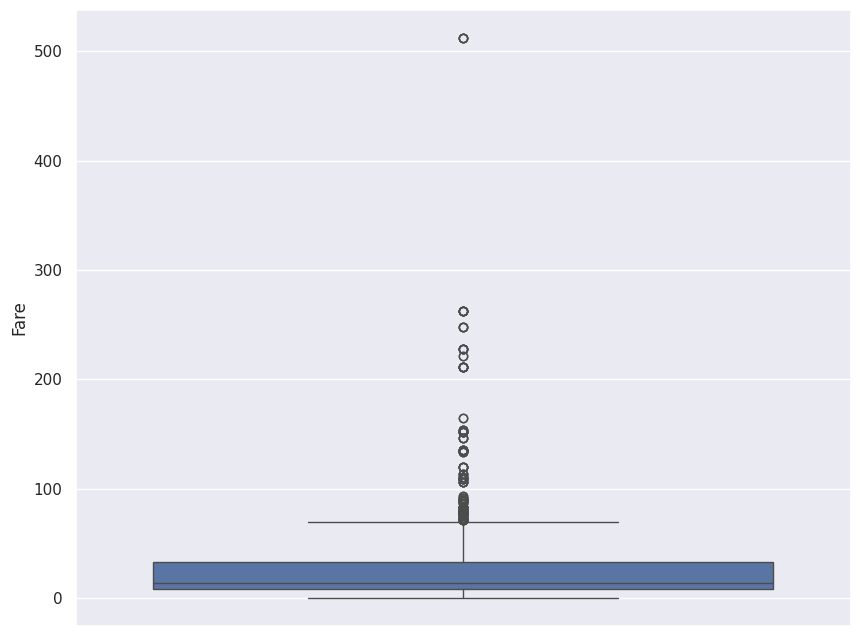

In [53]:
plt.figure(figsize=(10,8))
sns.boxplot(titanic_df['Fare'])

In [54]:
# Checking for missing values

titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            182
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          789
Embarked       102
dtype: int64

In [55]:
titanic_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [60]:
# prompt: replace missing values in embarked column with unknwn

titanic_df['Embarked'] = titanic_df['Embarked'].fillna('Unknown')


In [61]:
titanic_df['Embarked'].value_counts()

Embarked
S          830
C          285
Q          174
Unknown    102
Name: count, dtype: int64

In [57]:
titanic_df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [58]:
# Checking for duplicates

titanic_df.duplicated().value_counts()

False    1291
True      100
Name: count, dtype: int64

In [59]:
# Dropping unnecessary columns: cabin, name, ticket

titanic_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)



In [62]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,0.0,3,male,22.0,1.0,0.0,7.2500,S
1,2.0,1.0,1,female,38.0,1.0,0.0,71.2833,C
2,3.0,1.0,3,female,26.0,0.0,0.0,7.9250,S
3,4.0,1.0,1,female,35.0,1.0,0.0,53.1000,S
4,5.0,0.0,3,male,35.0,0.0,0.0,8.0500,S
